In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Data Exploration and Analysis of Bank Customer Churn Dataset

# Correlation Analysis of Bank Customer Churn Dataset

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# File paths for the train and test datasets in Google Drive
train_file_path = '/content/drive/My Drive/DATASET/train.csv'
test_file_path = '/content/drive/My Drive/DATASET/test.csv'

# Load the datasets into DataFrames
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Preview the first few rows of both datasets
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

# Get information on the structure and data types for both datasets
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Dataset:
   id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15635502.0   Pirozzi        632.0    France  Female  63.0     5.0   
1   1  15595440.0   Horsley        730.0   Germany  Female  35.0     5.0   
2   2  15803566.0      Zito        598.0     Spain    Male  45.0     2.0   
3   3  15693906.0  Iloerika        678.0    France  Female  38.0     9.0   
4   4  15679531.0     K'ung        710.0    France  Female  32.0     4.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00            2.0        0.0             1.0        140780.80   
1  182532.23            2.0        1.0             1.0        136491.32   
2   94049.92            1.0        1.0             1.0        131718.12   
3       0.00            2.0        1.0             1.0        164768.82   
4       0.00            

In [ ]:
train_df.nunique()

,0
id,15000
CustomerId,6293
Surname,764
CreditScore,379
Geography,3
Gender,2
Age,54
Tenure,12
Balance,3354
NumOfProducts,4


In [ ]:
test_df.nunique()

,0
id,10000
CustomerId,5249
Surname,719
CreditScore,366
Geography,3
Gender,2
Age,56
Tenure,11
Balance,2422
NumOfProducts,4


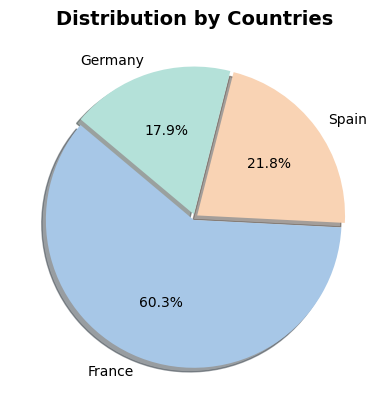

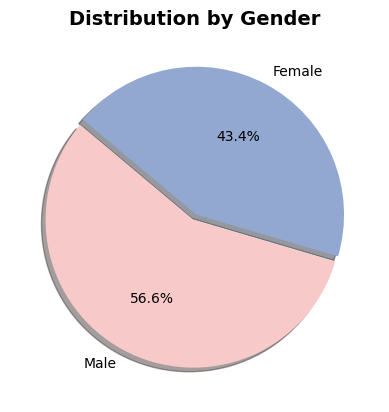

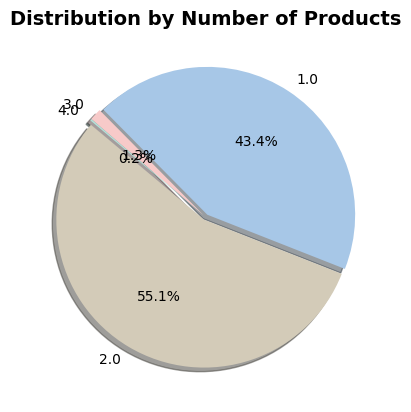

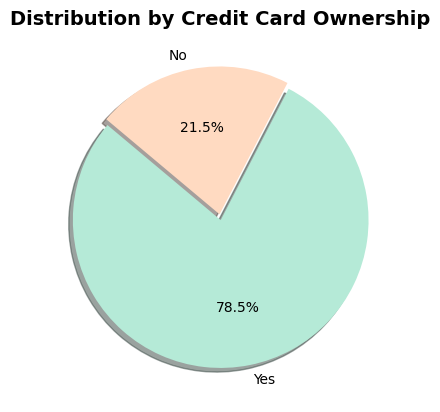

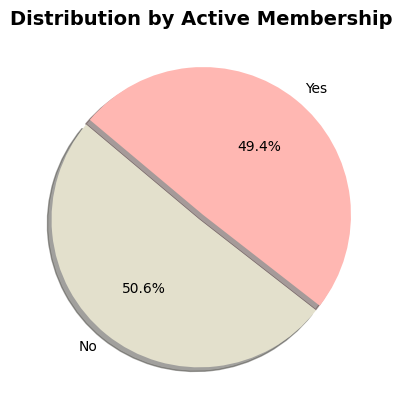

In [ ]:
# Palette 2024 plus douce et apaisante
colors_geo = ['#A7C7E7', '#F9D3B4', '#B4E1D9']  # Light blue, peach, mint green
colors_gender = ['#F7CAC9', '#92A8D1']  # Light pink and blue-grey
colors_products = ['#D3CBB8', '#A7C7E7', '#F7CAC9', '#B4E1D9']  # Earthy and pastel
colors_credit_card = ['#B5EAD7', '#FFDAC1']  # Soft green and light orange
colors_active_member = ['#E3E0CC', '#FFB7B2']  # Soft beige and peach

# Geography pie chart
count = train_df['Geography'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', colors=colors_geo, explode=[0.02]*len(count), shadow=True, startangle=140)
plt.title('Distribution by Countries', fontsize=14, fontweight='bold')
plt.show()

# Gender pie chart
count = train_df['Gender'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', colors=colors_gender, explode=[0.02]*len(count), shadow=True, startangle=140)
plt.title('Distribution by Gender', fontsize=14, fontweight='bold')
plt.show()

# Number of Products pie chart
count = train_df['NumOfProducts'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', colors=colors_products, explode=[0.02]*len(count), shadow=True, startangle=140)
plt.title('Distribution by Number of Products', fontsize=14, fontweight='bold')
plt.show()

# Credit Card pie chart (using a temporary column for mapping)
credit_card_temp = train_df['HasCrCard'].map({0: 'No', 1: 'Yes'})
count = credit_card_temp.value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', colors=colors_credit_card, explode=[0.02]*len(count), shadow=True, startangle=140)
plt.title('Distribution by Credit Card Ownership', fontsize=14, fontweight='bold')
plt.show()

# Active Member pie chart (using a temporary column for mapping)
active_member_temp = train_df['IsActiveMember'].map({0: 'No', 1: 'Yes'})
count = active_member_temp.value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', colors=colors_active_member, explode=[0.02]*len(count), shadow=True, startangle=140)
plt.title('Distribution by Active Membership', fontsize=14, fontweight='bold')
plt.show()


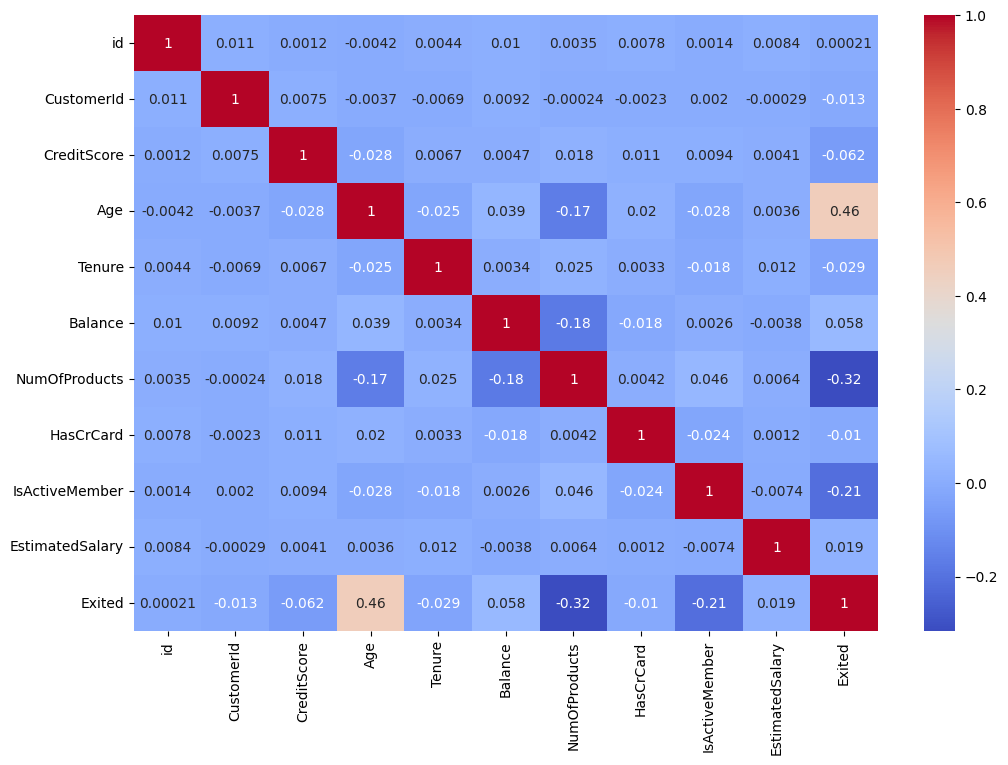

In [ ]:
# Select only numeric columns from the train dataset
numeric_columns = train_df.select_dtypes(include=['float64', 'int64'])

# Display correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.show()

The heatmap shows the correlation between different numerical features in the bank customer churn dataset. Key insights from the correlation matrix include:

   - Age and Exited (0.46): There is a moderate positive correlation between age and churn, indicating that older customers are more likely to leave the bank.

   - NumOfProducts and Exited (-0.32): There is a moderate negative correlation between the number of products and churn. Customers with more products are less likely to churn.
   ## This analysis highlights age and number of products as key features related to customer churn.

# Binary and One-Hot Encoding for Categorical Variables

### ---> Geography, Gender are the categorical features

In [ ]:
 #Function to apply the necessary transformations
def preprocess_data(df):
    # Step 1: Drop the 'Surname' column as it's not useful for modeling
    df = df.drop(columns=['Surname'])

    # Step 2: Perform One-Hot Encoding for 'Geography' column to convert it into numerical data
    # We use drop_first=True to avoid multicollinearity by dropping one category (dummy variable trap)
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

    # Step 3: Convert 'Gender' into binary values: 0 for 'Male' and 1 for 'Female'
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

    return df

# Apply the transformations to both train and test datasets
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Save the transformed train and test data as CSV files in Google Drive
train_df.to_csv('/content/drive/My Drive/DATASET/train_transformed.csv', index=False)
test_df.to_csv('/content/drive/My Drive/DATASET/test_transformed.csv', index=False)

print("The transformed files have been saved to Google Drive.")

The transformed files have been saved to Google Drive.


# Verification of Censoring

In survival analysis, censoring refers to data where the event of interest (e.g., customer churn) has not occurred yet by the end of the observation period. This means identifying which customers have not yet left the bank during the observation period and thus are considered censored

Number of censored customers (Exited = 0): 11937
Number of non-censored customers (Exited = 1): 3063


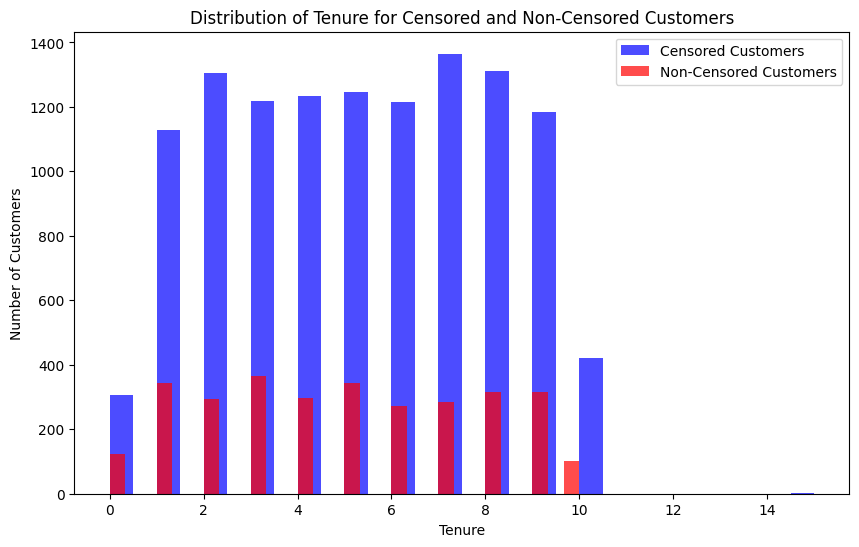

In [ ]:
# Check the number of censored and non-censored customers
censored_customers = train_df[train_df['Exited'] == 0]
non_censored_customers = train_df[train_df['Exited'] == 1]

# Print the counts
print("Number of censored customers (Exited = 0):", len(censored_customers))
print("Number of non-censored customers (Exited = 1):", len(non_censored_customers))

# Optional: Analyze the distribution of 'Tenure' for censored and non-censored customers
plt.figure(figsize=(10, 6))
plt.hist(censored_customers['Tenure'], bins=30, alpha=0.7, label='Censored Customers', color='blue')
plt.hist(non_censored_customers['Tenure'], bins=30, alpha=0.7, label='Non-Censored Customers', color='red')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()
plt.title('Distribution of Tenure for Censored and Non-Censored Customers')
plt.show()